## MLP for Binary Classification

In this lab, you will use the Ionosphere data binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more in the links below.

[Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)

[Ionosphere Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)


Your task for this is lab is to develop a Keras-based Multi-Layer Perceptron model for this data set. Remember the number of output layers is equal to the number of classes.

Following we have provided some piece of code to you while you need to complete the rest of the code on your own.



In [3]:
# Importing Libraries

from pandas import read_csv  # Importing read_csv class from pandas
from sklearn.model_selection import train_test_split  # Importing train_test_split class from sklearn

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# Read the dataset from the path below. Store the data in a pandas dataframe named 'df'

Link to API - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [4]:
import pandas as pd

# Your code to read the csv from the above path
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv')


See the sample dataset. Print few rows of the dataset. Use dataframe.head() method.

Link to API:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [5]:
# Your code to print first few rows of the dataset.
df.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


Print the basic info of the dataset. Use dataframe.info() from pandas library


In [6]:
# Your code to print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1          350 non-null    int64  
 1   0          350 non-null    int64  
 2   0.99539    350 non-null    float64
 3   -0.05889   350 non-null    float64
 4   0.85243    350 non-null    float64
 5   0.02306    350 non-null    float64
 6   0.83398    350 non-null    float64
 7   -0.37708   350 non-null    float64
 8   1.1        350 non-null    float64
 9   0.03760    350 non-null    float64
 10  0.85243.1  350 non-null    float64
 11  -0.17755   350 non-null    float64
 12  0.59755    350 non-null    float64
 13  -0.44945   350 non-null    float64
 14  0.60536    350 non-null    float64
 15  -0.38223   350 non-null    float64
 16  0.84356    350 non-null    float64
 17  -0.38542   350 non-null    float64
 18  0.58212    350 non-null    float64
 19  -0.32192   350 non-null    float64
 20  0.56971   

Print the shape of the dataframe. Select suitable API call from the pandas library

In [7]:
# Your code to print the shape of the dataset
df.shape

(350, 35)

# Separate the input and output from the dataframe. Input is all columns besides last column. Output is the last column.


In [8]:
X = df.values[:, :-1]
# Your code to get y - Hint y = df.values[:, some parameters]
y = df.values[:, -1]

We have converted everthing in X to 'float' and the letters in column y to the numbers in the following cell.

X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

In [9]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

Printing the genral information of the X and y in the following cell

In [10]:
# Convert X to float32
X = X.astype('float32')

# Convert y labels to numbers
y = LabelEncoder().fit_transform(y)

# Printing general information
print("X:")
print(X)
print("y:")
print(y)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


X:
[[ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 [ 1.       0.       1.      ...  1.      -0.32382  1.     ]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
y:
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1

* Separate X and y into training and test set with a ratio of your choice.
* Print the shapes of the resulting arrays.
* Get the number of features from X_train. Remember the number of features are the number of inputs.

Use sklearn train_test_split class.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [11]:
from sklearn.model_selection import train_test_split

# Separate the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Get the number of features from X_train
n_features = X_train.shape[1]


Shape of X_train: (280, 34)
Shape of X_test: (70, 34)
Shape of y_train: (280,)
Shape of y_test: (70,)


# Creating a Multi-layer Perceptron using Keras.
We have added first and last layers. Create the hidden layers of your choise.
You can chose any number of hidden layers and activation function of your chose
https://keras.io/api/layers/core_layers/dense/

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creating a Multi-layer Perceptron using Keras
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))  # First hidden layer
# Adding more hidden layers (you can add more as per your choice)
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation function

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                350       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 525 (2.05 KB)
Trainable params: 525 (2.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In the next cell, we trained the above neural network model and tested its accuracy. As this concept has still not benn covered in the class, just run the code to check the accuracy.

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.857


In [14]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9786
Epoch 2/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9786
Epoch 3/150
9/9 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9786
Epoch 4/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9786
Epoch 5/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9786
Epoch 6/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9786
Epoch 7/150
9/9 [==============================] - 0s 1ms/step - loss: 0.1926 - accuracy: 0.9786
Epoch 8/150
9/9 [==============================] - 0s 936us/step - loss: 0.1918 - accuracy: 0.9786
Epoch 9/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9786
Epoch 10/150
9/9 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.9786
Epoch 11/150
9/9 [=========

** How much accuracy have you got? Compare the accuracy with your peers. **
** Now, change your model and activation function to get the better accuracy as compared to your peers **

In [15]:
# evaluate the model

loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

3/3 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8714
Test Accuracy: 0.871


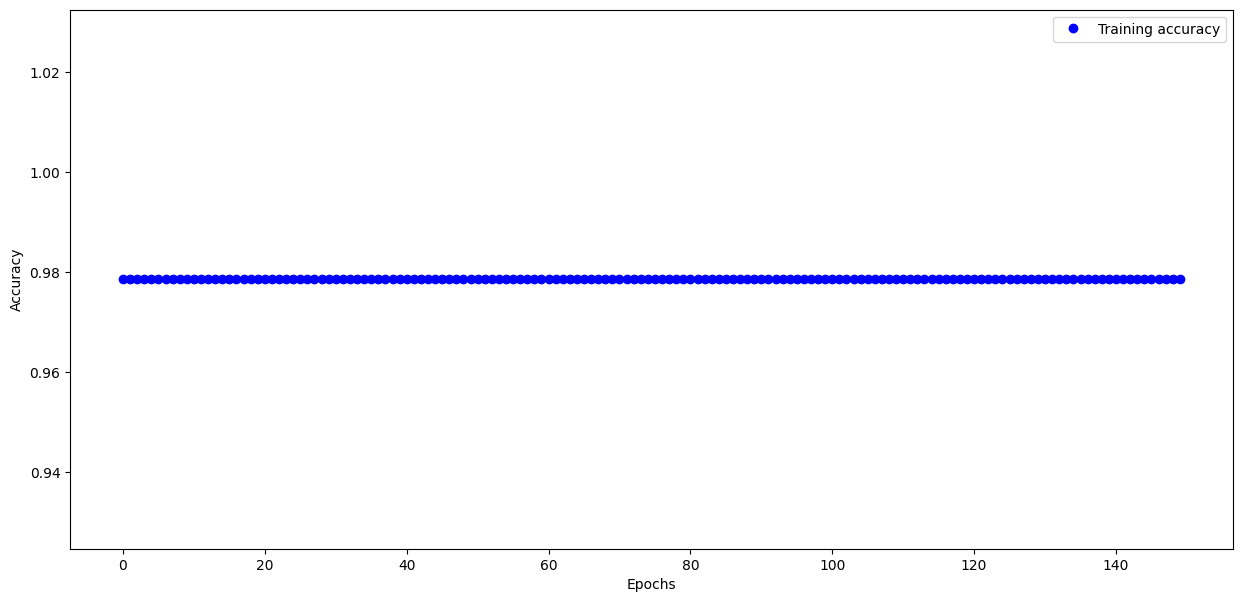

In [16]:
# Accuracy graphs during training
import matplotlib.pyplot as plt

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
Dense?

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`). These are all attributes of
`Dense`.

Note: If the input to the layer has a rank greater than 2, then `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_size, d0

In [19]:
# define the NEW model

model = Sequential()
model.add(Dense(10, activation='gelu', input_shape=(n_features,)))


#
# Add as many layers with activation functions of your choice
#
model.add(Dense(8, activation='gelu'))
model.add(Dense(5, activation='gelu'))


model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                350       
                                                                 
 dense_10 (Dense)            (None, 8)                 88        
                                                                 
 dense_11 (Dense)            (None, 5)                 45        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
Total params: 489 (1.91 KB)
Trainable params: 489 (1.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history2 = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
9/9 [==============================] - 1s 1ms/step - loss: 0.7280 - accuracy: 0.3286
Epoch 2/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.4893
Epoch 3/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.7179
Epoch 4/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.7429
Epoch 5/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.7429
Epoch 6/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.7429
Epoch 7/150
9/9 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7500
Epoch 8/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5867 - accuracy: 0.7571
Epoch 9/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.7679
Epoch 10/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7714
Epoch 11/150
9/9 [===========

In [23]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

3/3 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9000
Test Accuracy: 0.900


model.summary()

## **Important:** Document in your lab logbook the accuracy of the improved model. Do not include any code or explanations in your lab logbook. Simply record the accuracy. For example, if the obtained accuracy is 0.98, then enter "0.98" in your lab logbook.

## In addition to the accuracy, also document the output of the neural network as provided in Task 2.



Next, we have provided the code to predict on an unknown value.
We will cover these concepts later in the class. For now, just run the code to see the prediction.

In [24]:
row = [1,0,0.99539,-0.05889,0.85243,0.02306,
       0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
       0.59755,-0.44945,0.60536,-0.38223,0.84356,
       -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
       -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
       -0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 73ms/step
Predicted: 0.907


/tmp/ipykernel_563982/3885243746.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat)


In [25]:
model_2 = Sequential()
model_2.add(Dense(17, activation='relu', input_shape=(n_features,), kernel_initializer="he_normal"))
model_2.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model_2.add(Dense(8, activation='relu', kernel_initializer="he_normal"))
model_2.add(Dense(1, activation='sigmoid'))

In [26]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 17)                595       
                                                                 
 dense_14 (Dense)            (None, 10)                180       
                                                                 
 dense_15 (Dense)            (None, 8)                 88        
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 872 (3.41 KB)
Trainable params: 872 (3.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history_3 = model_2.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
9/9 [==============================] - 0s 1ms/step - loss: 0.7796 - accuracy: 0.3714
Epoch 2/150
9/9 [==============================] - 0s 1ms/step - loss: 0.7138 - accuracy: 0.5036
Epoch 3/150
9/9 [==============================] - 0s 996us/step - loss: 0.6747 - accuracy: 0.6000
Epoch 4/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.6821
Epoch 5/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.7250
Epoch 6/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6290 - accuracy: 0.7679
Epoch 7/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.8250
Epoch 8/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.8679
Epoch 9/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.8857
Epoch 10/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.8964
Epoch 11/150
9/9 [=========

In [29]:
loss, acc = model_2.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

3/3 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8857
Test Accuracy: 0.886


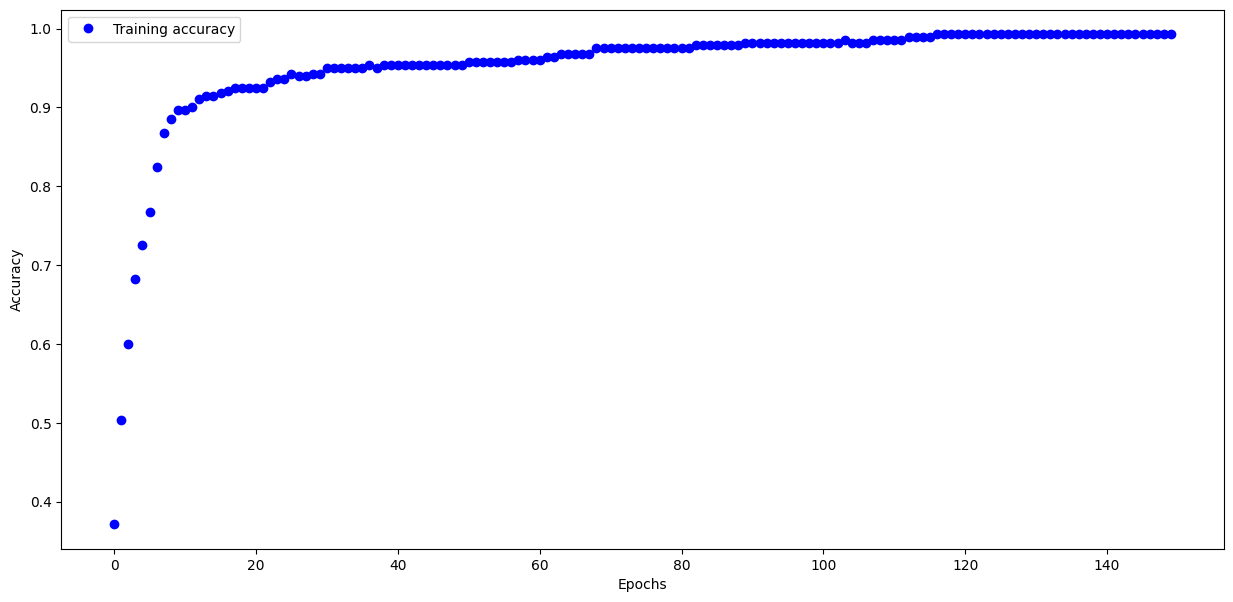

In [30]:
history_dict = history_3.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
row = [1,0,0.99539,-0.05889,0.85243,0.02306,
       0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
       0.59755,-0.44945,0.60536,-0.38223,0.84356,
       -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
       -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
       -0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model_2.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 50ms/step
Predicted: 0.966


/tmp/ipykernel_563982/3434744342.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat)


### Try out the same model with Keras Functional models!
Refer to [Keras](https://keras.io/) for more details and tutorials for the same.

In [32]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense


In [33]:
# define the layers

x_in = Input(shape=(n_features,))

x_in

<KerasTensor: shape=(None, 34) dtype=float32 (created by layer 'input_1')>

In [34]:
x_1 = Dense(10, activation='relu')(x_in)
x_2 = Dense(8, activation='relu')(x_1)
x_out = Dense(1, activation='sigmoid')(x_2)

In [35]:
# define model

model_3 = Model(inputs=x_in, outputs=x_out)

In [36]:
print(model_3.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense_17 (Dense)            (None, 10)                350       
                                                                 
 dense_18 (Dense)            (None, 8)                 88        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 447 (1.75 KB)
Trainable params: 447 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [37]:
# compile the model

model_3.compile(optimizer="adam",
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


In [38]:
# fit the model

history_4 = model_3.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.6643
Epoch 2/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6750
Epoch 3/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6432 - accuracy: 0.6750
Epoch 4/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.6750
Epoch 5/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.6714
Epoch 6/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.6714
Epoch 7/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.6893
Epoch 8/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5758 - accuracy: 0.6964
Epoch 9/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5657 - accuracy: 0.7036
Epoch 10/150
9/9 [==============================] - 0s 986us/step - loss: 0.5544 - accuracy: 0.7143
Epoch 11/150
9/9 [=========

In [39]:
# evaluate the model

loss, acc = model_3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.871


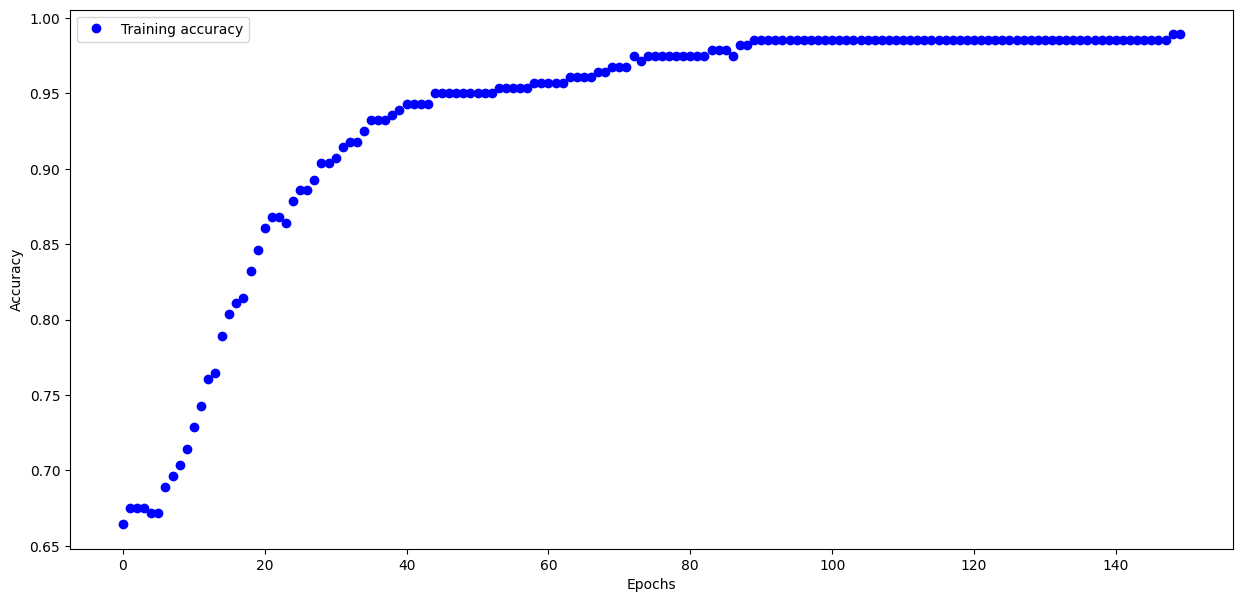

In [40]:
history_dict = history_4.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# make a prediction - Copy a row of your choice!

row = [1,0,0.99539,-0.05889,0.85243,0.02306,
 0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
 0.59755,-0.44945,0.60536,-0.38223,0.84356,
 -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
 -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
 -0.34090,0.42267,-0.54487,0.18641,-0.45300]

yhat = model_3.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 56ms/step
Predicted: 0.985


/tmp/ipykernel_563982/4213957503.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat)
